In [165]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
%matplotlib inline

In [56]:
mydic = np.load('/Users/scollis/data/noise_floor_detect_30MHz.npy', allow_pickle=True)

In [57]:
mydic[0]

{'time': <function time.time>,
 'max': 0.1497402595453866,
 'mean': 0.03270628827625088,
 'stddev': 0.018046793705994334}

In [58]:
maxs = np.array([this['max'] for this in mydic])

Text(0, 0.5, 'Max signal (arb)')

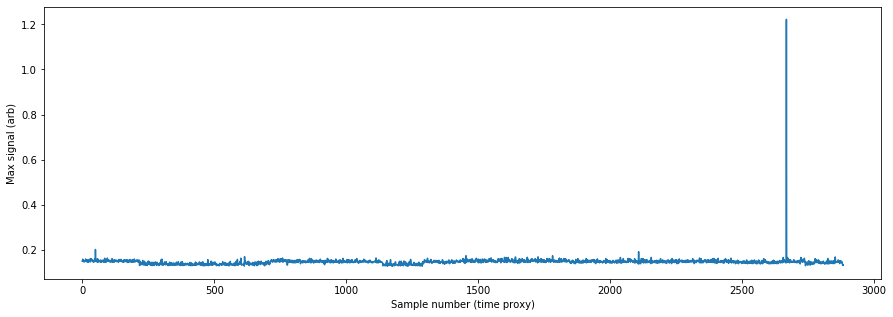

In [59]:
myfi = plt.figure(figsize=[15,5])
plt.plot(maxs)
plt.xlabel('Sample number (time proxy)')
plt.ylabel('Max signal (arb)')

In [311]:
ts = np.load('/users/scollis/data/event_200719_1834_12_0p7863.npy', allow_pickle=True).item()

In [312]:
dt = 1./2.048e6
xtime = np.arange(len(ts['sig'])) * dt


Text(0.5, 0, 'Time since start (s)')

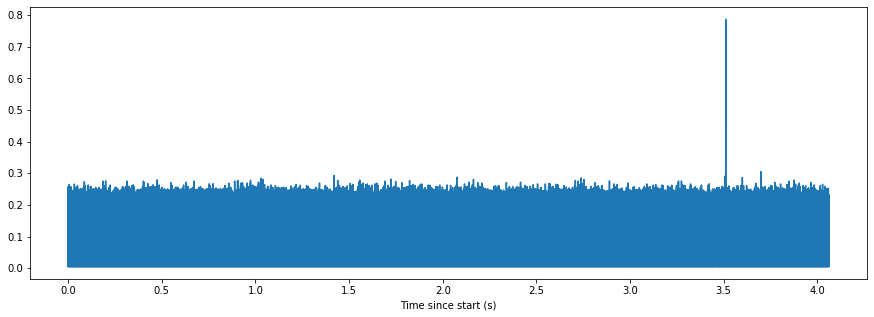

In [313]:
myfi = plt.figure(figsize=[15,5])
plt.plot(xtime, np.abs(ts['sig']))
plt.xlabel('Signal (Arb)')
plt.xlabel('Time since start (s)')

In [314]:
maxme = np.where(np.abs(ts['sig']) == np.max(np.abs(ts['sig'])))[0][0]
t_max = xtime[maxme]
print(t_max)

3.5112783203125


In [315]:
window = 2e-3

(3.5102783203125, 3.5122783203125)

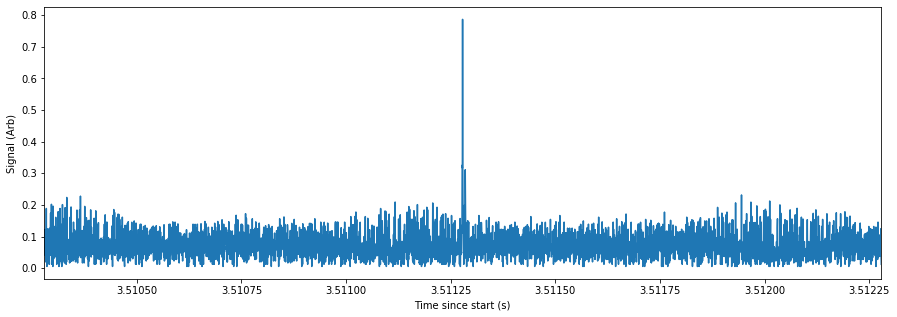

In [316]:
myfi = plt.figure(figsize=[15,5])
plt.plot(xtime, np.abs(ts['sig']))
plt.ylabel('Signal (Arb)')
plt.xlabel('Time since start (s)')
t0 = t_max - window/2.
t1 =  t_max + window/2.
plt.xlim([t0,t1])

In [317]:
ts['sig']

array([ 0.06666667-0.10588235j,  0.08235294+0.01960784j,
       -0.01960784+0.02745098j, ..., -0.11372549+0.05882353j,
       -0.09803922+0.02745098j, -0.03529412-0.01960784j])

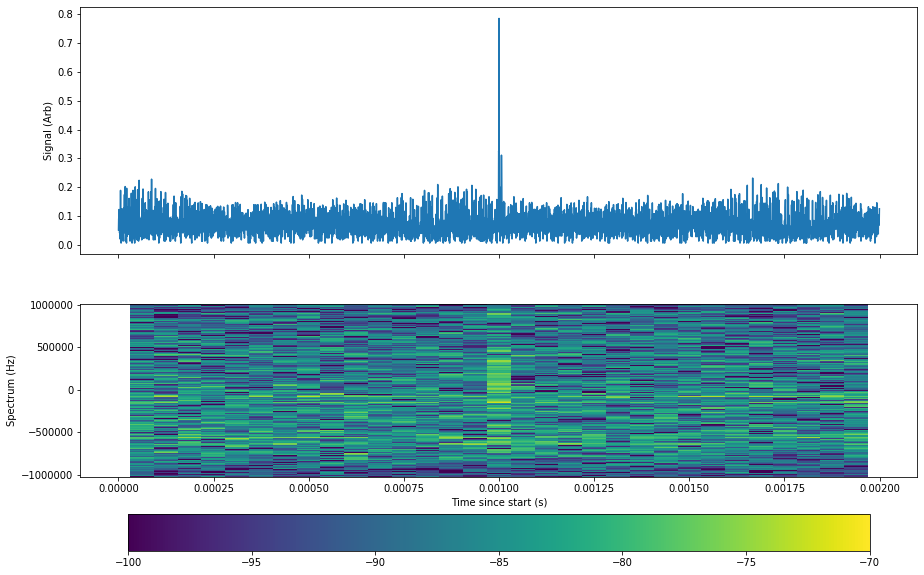

In [318]:
#ts = np.load('./event_200715_1519_17_0p4086.npy', allow_pickle=True).item()
fs = 2.048e6
#t0, t1 = 0.47, 0.475
sub = slice(int(t0*fs),int(t1*fs))

dt = 1./fs
xtime = np.arange(len(ts['sig'])) * dt
myfi, axs = plt.subplots(2,1, figsize=[15,10], sharex=True)
axs[0].plot(xtime[sub]-t0, np.abs(ts['sig'])[sub])
# axs[0].plot(xtime[sub], np.abs(ts['sig'])[sub])
_,_,_,sgimg = axs[1].specgram(ts['sig'][sub], Fs=fs, vmin=-100, vmax=-70)
axs[0].set_ylabel('Signal (Arb)')
axs[1].set_ylabel('Spectrum (Hz)')
axs[1].set_xlabel('Time since start (s)')
plt.colorbar(sgimg, orientation='horizontal', ax=axs[1])

In [319]:
filtered_data = signal.savgol_filter(np.abs(ts['sig']),5 ,2)
locs, props = signal.find_peaks(filtered_data, height = .25, distance = 10000, width = 1)

In [320]:
locs

array([7191098])

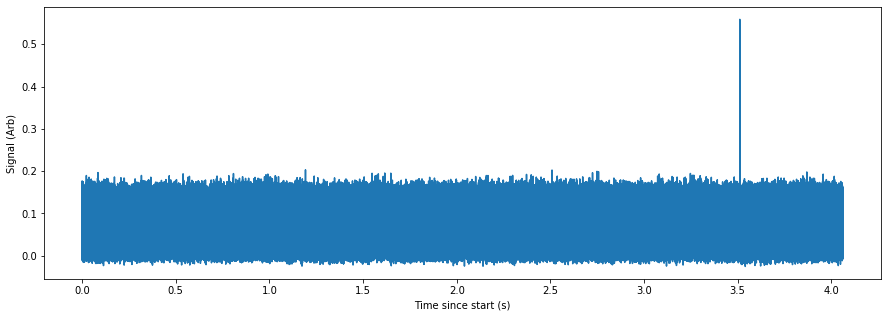

In [321]:
myfi = plt.figure(figsize=[15,5])
plt.plot(xtime, filtered_data)
plt.ylabel('Signal (Arb)')
plt.xlabel('Time since start (s)')
t0 = t_max - window/2.
t1 =  t_max + window/2.
#plt.xlim([t0,t1])

In [322]:
def plot_pulse(ts, time, window):
    t0 = time - window/2.
    t1 =  time + window/2.
    fs = 2.048e6
    sub = slice(int(t0*fs),int(t1*fs))
    dt = 1./fs
    xtime = np.arange(len(ts['sig'])) * dt
    myfi, axs = plt.subplots(2,1, figsize=[15,10], sharex=True)
    axs[0].plot(xtime[sub]-t0, np.abs(ts['sig'])[sub])
    # axs[0].plot(xtime[sub], np.abs(ts['sig'])[sub])
    _,_,_,sgimg = axs[1].specgram(ts['sig'][sub], Fs=fs, vmin=-100, vmax=-70)
    axs[0].set_ylabel('Signal (Arb)')
    axs[1].set_ylabel('Spectrum (Hz)')
    axs[1].set_xlabel('Time since start (s)')
    plt.colorbar(sgimg, orientation='horizontal', ax=axs[1])

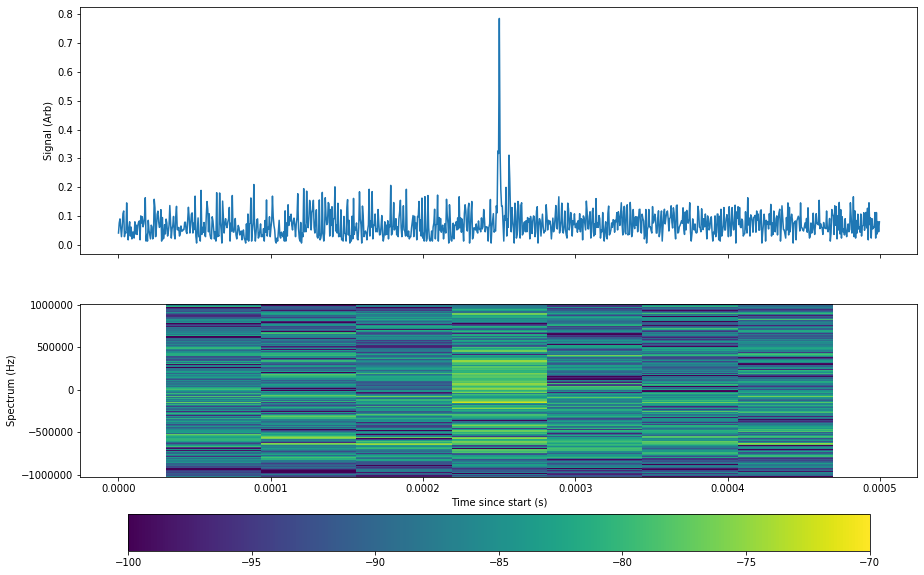

In [325]:
for loc in locs:
    plot_pulse(ts, xtime[loc], 5e-4)


In [266]:
1e-3/dt

2048.0